# Проект "Сеть фитнес-центров «Культурист-датасаентист»"

Описание: 

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. 

Задачи проекта:

- научится прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.

## Чтение данных 

Импортируем нужные библиотеки

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [7]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Изучим общую информацию о данных

In [8]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Набор данных включает следующие поля:

Данные клиента за предыдущий до проверки факта оттока месяц:

'gender' — пол;

'Near_Location' — проживание или работа в районе, где находится фитнес-центр;

'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);

Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

'Phone' — наличие контактного телефона;

'Age' — возраст;

'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);

'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);

'Group_visits' — факт посещения групповых занятий;

'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;

'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;

'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

'Churn' — факт оттока в текущем месяце.

Все столбцы в цифровом формате, строковых значений нет

Приведем названия столбцов к нижнему регистру.

In [9]:
gym.columns = gym.columns.str.lower()

**Вывод по разделу**

Данные готовы к исследованию, пропусков нет.

## Проведем исследовательский анализ данных

In [10]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Изучим средние значения по всем клиентам:

- мужчин и женщин в фитнес-клубе одинаковое количество
- 85% тех кто проживает или работает вблизи фитнеса
- 49% клиентов сотрудники компаний-партнеров
- 30 % приводят друзья
- 90 % указывают свой номер телефона
- средний срок абонемента 4,7 месяца
- 41% посещают груповые занятия
- средний возраст клиентов 29 лет
- в среднем на другие услуг фитнес-центра тратят на 147 у.е
- среднее количество месяцев до конца абонемента - 4,32
- среднее время с момента первого обращения в фитнес-центр 3.7 месяца
- среднее количество посещений в неделю - 1.88 за все время с начала действия абонемента
- средняя частота посещений в неделю за предыдущий месяц - 1.77
- средний отток составляет 26 %









### Рассмотрим средние значения тех кто ушел в этом месяце и тех, кто продолжает занятия.

In [11]:
churn_group = gym.groupby('churn').mean()
churn_group = churn_group.transpose()
churn_group.columns = ['still', 'churn']
churn_group['dif'] = churn_group['still'] - churn_group['churn']
churn_group

,still,churn,dif
gender,0.510037,0.510839,-0.000801
near_location,0.873086,0.768143,0.104943
partner,0.534195,0.355325,0.178870
promo_friends,0.353522,0.183789,0.169733
phone,0.903709,0.902922,0.000787
contract_period,5.747193,1.728558,4.018635
group_visits,0.464103,0.268615,0.195489
age,29.976523,26.989632,2.986890
avg_additional_charges_total,158.445715,115.082899,43.362816
month_to_end_contract,5.283089,1.662582,3.620507


Среди тех кто остался:
- на 10% больше тех, кто живет или работает рядом
- на 17% больше клиентов сотрудники компаний-партнеров
- на 16% больше тех, кто пришел по приглашению друзей
- в среднем на 4 месяца больше срок купленного абонемента
- на 19% больше клиентов, которые посещают групповые программы
- средний возраст оставшихся примерно на 3 года выше
- на 43 у.е больше денег оставшиеся клиенты тратят на доп услуги
- на 3,5 месяца больше срок оставшего оплаченного абонемента у клиентов, которые остались
- существенно выше среднее время с момента первого обращения в фитнес-центр у тех, кто остается. Уходят в среднем после 1 месяца посещения.
- среднее количество посещений в неделю за все время выше на 0,5 раз в неделю у тех, кто остался 
- среднее количество посещений в неделю за последний месяц выше на 1 раз в неделю у тех, кто остался 

### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

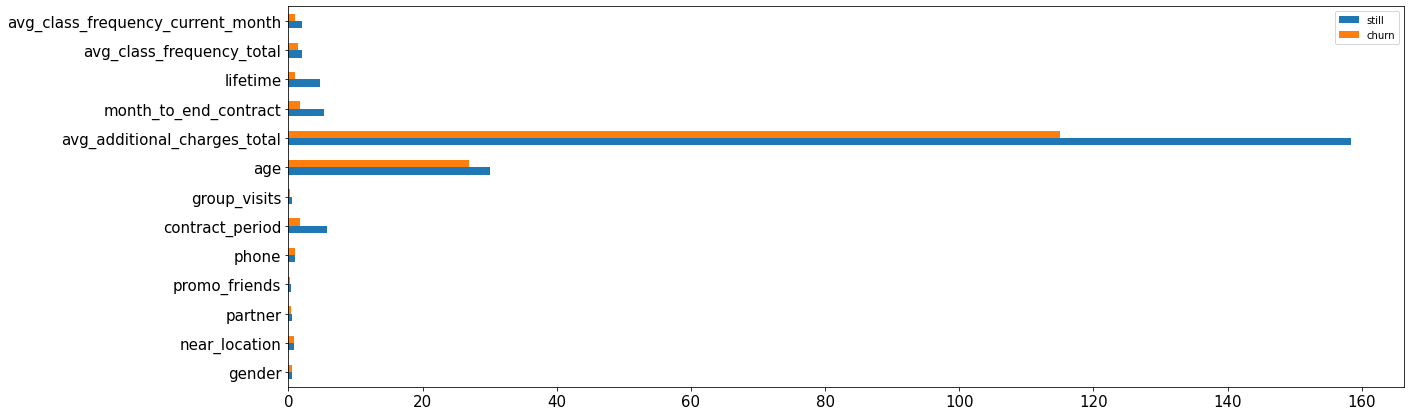

In [12]:
churn = churn_group.drop(['dif'], axis=1)
churn.plot(kind='barh',figsize=(20, 7), fontsize=15);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


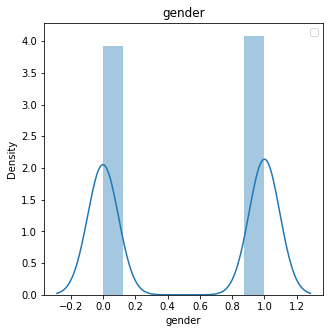

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


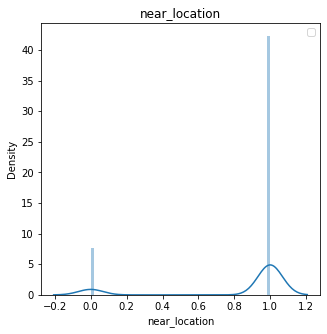

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


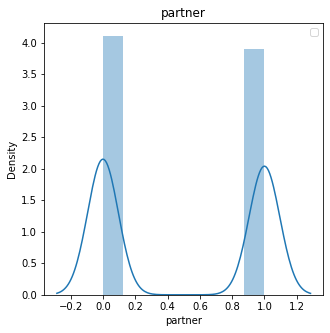

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


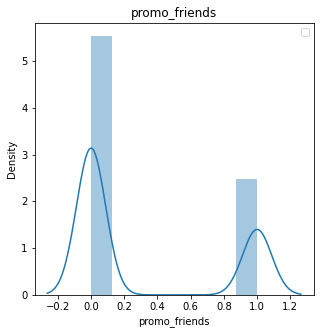

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


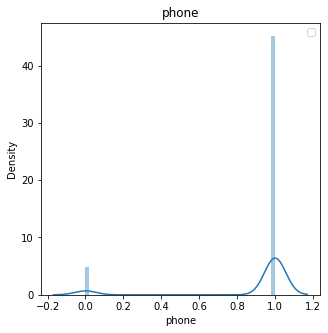

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


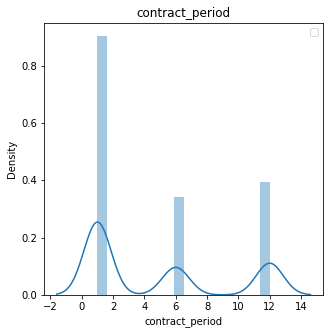

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


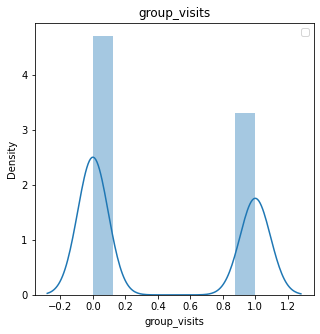

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


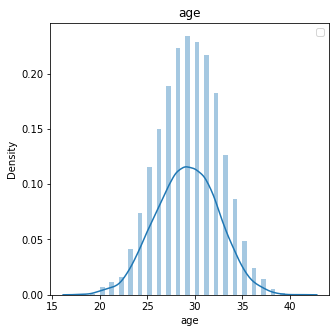

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


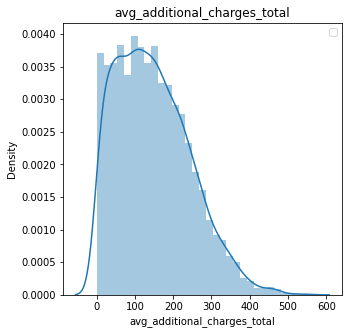

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


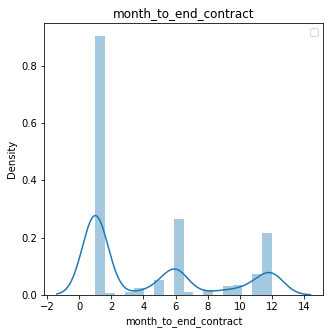

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


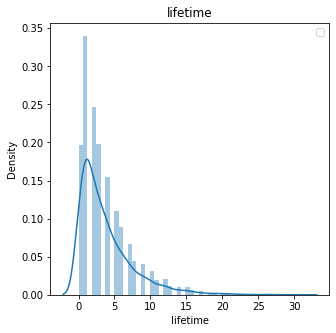

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


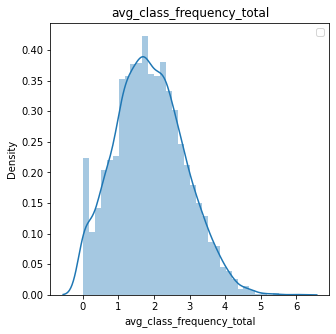

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


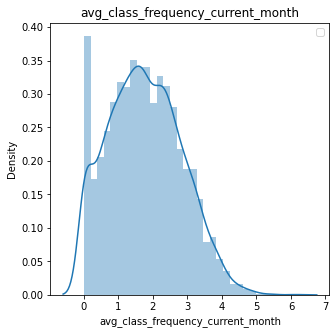

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


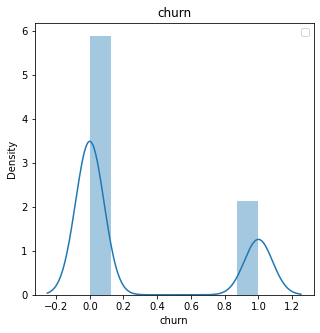

In [13]:
for column in gym.columns:
    plt.figure(figsize=(5, 5))
    gym.groupby('churn')[column]
    sns.distplot(gym[column])
    plt.title(column)
    plt.legend()
    plt.show()

Распределение признаков, которые содержат множественные значения, хорошо видно на следующих графиках





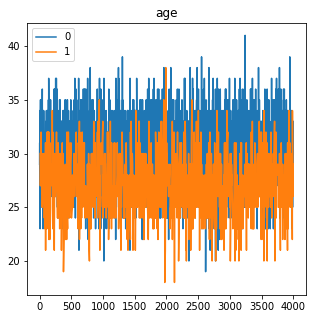

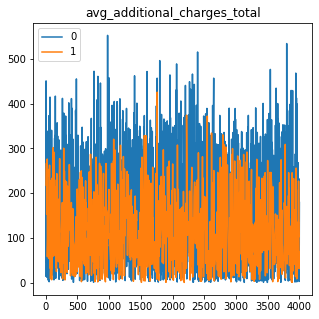

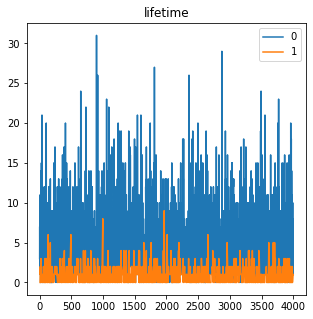

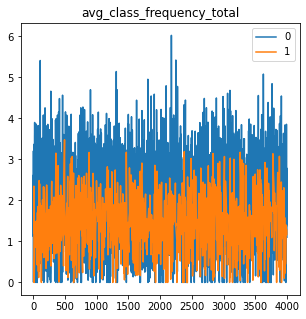

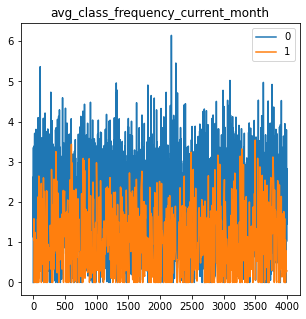

In [14]:
for column in ['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
  gr = gym.groupby('churn')[column]
  plt.figure(figsize=(5, 5))
  plt.title(column)
  gr.plot(legend= True)


По этим диаграммам, так же как по средним видно признаки, которые существенно отличаются у клиентов, которые остались и у тех, кто ушел. Это среднее количество посещений в неделю за последний месяц, больше срок купленного абонемента, посещают или нет групповые программы, сколько тратят на доп услуги, среднее время после первого обращения, клиенты сотрудники компаний-партнеров
те, кто пришел по приглашению друзей.


### Построим матрицу корреляций признаков

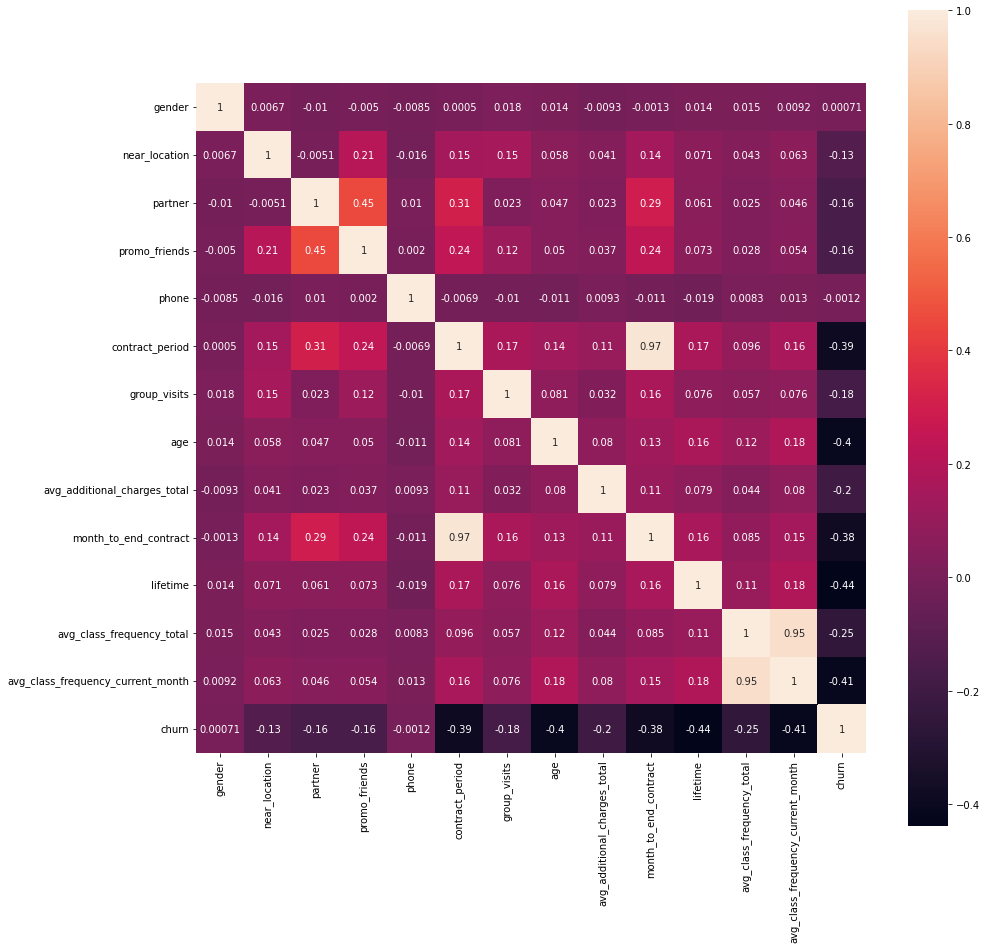

In [15]:
cm = gym.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot = True, square=True);

Наибольшая корреляция с целевой переменной у признаков: срок купленного абонемента, возраст, количество месяцев до окончания абонемента, время с первого посещения, среднее количество посещений в последний месяц.

Наибольшая кореляция между признаками: среднее количество посещений за все время и последний месяц, а также продолжительность абонемента и количество месяцев до конца абонемента. 

**Вывод по разделу** 

Уже на основе этого первоначального сравнения видно признаки, которые значительно отличаются у тех клиентов, кто продолжает заниматься и тех, кто ушел.

1) место жительства / работы,

2) клиенты из организаций партнеров и пришедшие по рекомендации друга

3) срок купленного абонемента

4) посещание групповых программ

5) возраст

6) траты на доп услуги

7) среднее количество посещений 



## Построим модель прогнозирования оттока клиентов

### Разбьем данные на обучающую и валидационную выборку 

In [16]:
X = gym.drop('churn', axis = 1)
y = gym['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Обучим модель на train-выборке логистической регрессией

Логистическая регрессия по умолчанию применяет регуляризацию, поэтому проводить удаление коррелирующих признаков не нужно. 


In [17]:
model = LogisticRegression(random_state = 0, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [18]:
y_pred = model.predict(X_test) 
probabilities =  model.predict_proba(X_test)[:,1]

### Обучим модель на train-выборке случайным лесом

In [19]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions =  rf_model.predict(X_test)# Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

Выведем метрики модели логистическорй регрессии

In [20]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))


Accuracy: 0.93
Precision: 0.86
Recall: 0.83


Выведем метрики модели случайного леса.

In [21]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))


Accuracy: 0.92
Precision: 0.84
Recall: 0.82


Accuracy - доля правильных ответов алгоритма.

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными

Recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.



**Вывод по разделу:** По всем метрикам модель логистической регрессии показала лучшие результаты.

## Сделаем кластеризацию клиентов

Удалим столбец с целевой переменной и стандартизируем данные

In [22]:
gym_sс = gym.drop(['churn'], axis=1)

sc = StandardScaler()
X_sc = sc.fit_transform(X)

Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. 

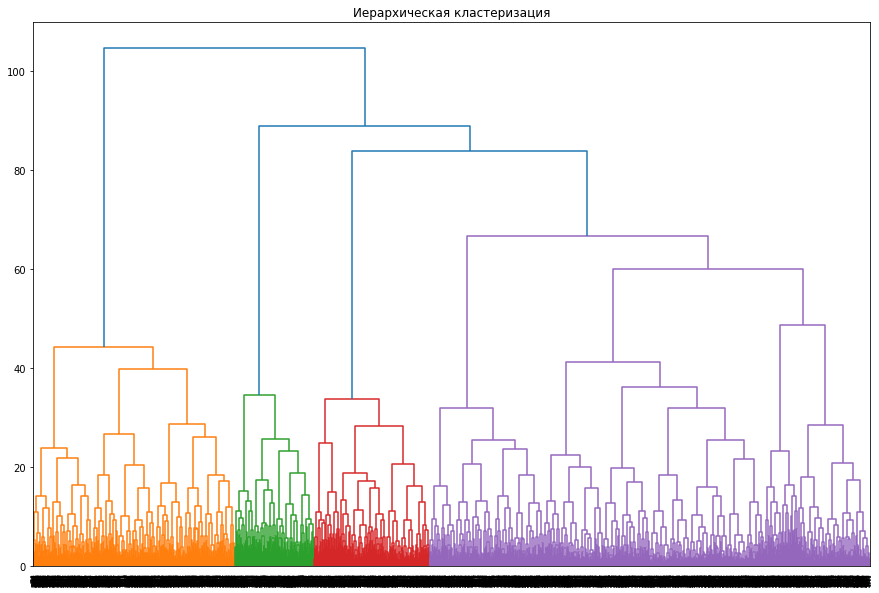

In [23]:
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show() 

Явно цветами выделяются 4 кластера, но также можно выделить 5 или 6 кластеров. Если смотреть на график и выделять 4 кластера, то 4-й получается очень большой. Я бы выделила 5 кластеров.

### Обучим модель кластеризации на основании алгоритма K-Means 

In [24]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc)

Добавим признак кластера в таблицу

In [25]:
gym['cluster'] = labels

In [26]:
gym['cluster'].value_counts()

3    1262
0    1010
4     838
2     505
1     385
Name: cluster, dtype: int64

По количеству клиенты не равномерно распределились в кластеры, больше всего клиентов попало в 3 и 0 кластер, меньше всего в 1.

In [27]:
gym.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


По средним значениям видно, что кластеры с номером 2 и 3 имеют высокую склонность оттока 44 и 51% соответсвенно. Кластеры с номерами 0, 1, 4 существенно ниже. 

Самые стабильные кластеры с номером 0 и 1. Отток около 3%. Главное различие между ними в сроке купленного абонемента, оставили ли свой телефон, также существенно различаются значения компаний-пртнеров. Но при этом остальные признаки почти совпадают и процент оттока одинаковый. 

Кластер с номером 2 выделяется тем, что клиенты не живут и не работают в районе фитнес центра и очень мало их них пришли по приглашению друзей, около 50% из компаний партнеров, только 20% из них ходят на групповые программы

Кластер с номером 3 на 100% живет или работает в районе фитнес центра, четверть их них пришли по приглашению друга, в этом кластере самый низкий срок купленного абонемента, они самые молодые и меньше всего денег тратят на доп услуги, также у них ниже стабильных кластеров посещение групповых программ и количество посещений в последний месяц. 

Интересен анализ средних значений кластера 4. Здесь клиенты также почти все живут или работают в районе фитнес центра, хотя немного из них пришли от компаний партнеров или друзей (здесь полное сходство с кластером 3), у них куплены не самые длинные абонементы (примерно как в кластере 2), но около 50% из них посещают групповые программы и занимаются в среднем 3 раза в неделю (этот парамерт у них выше всех остальных кластеров), также клиенты из этого  кластера имеют самую длинную lifetime. 


### Построим графики распределения признаков для кластеров.

Для категориальных признаков используем countplot

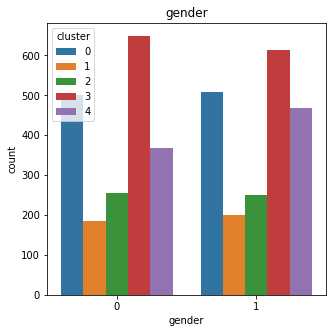

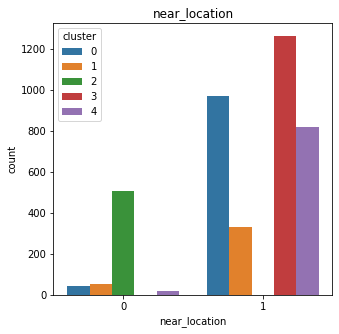

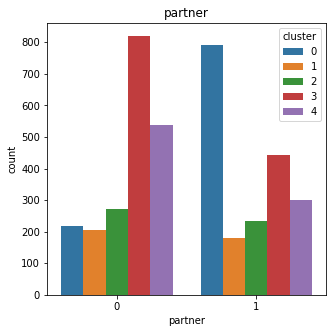

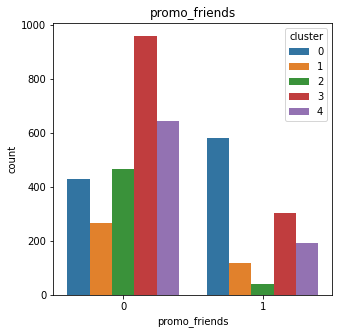

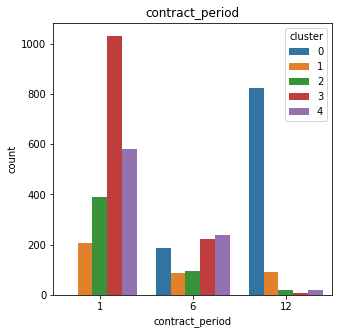

In [28]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = gym[column], hue='cluster', data=gym)
    plt.title(column)
    plt.show()

Для остальных признаков построим распределения с помощью boxplot

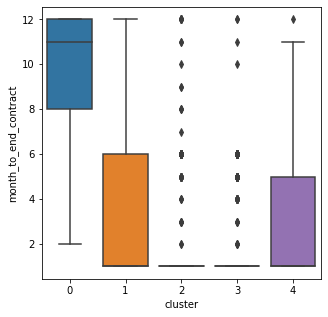

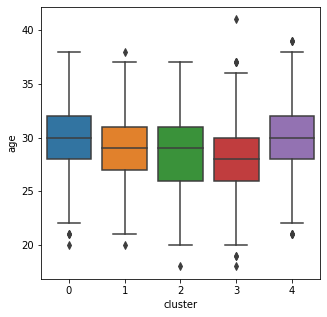

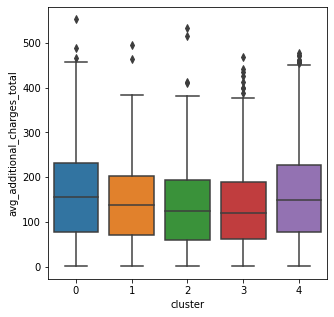

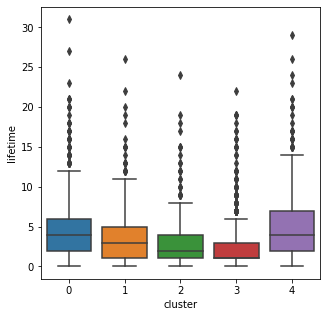

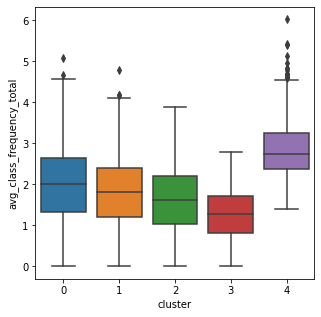

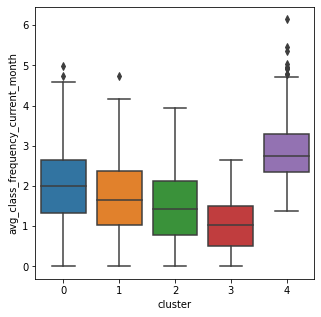

In [29]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'cluster', y = gym[column], data = gym)
    plt.show()

По графикам распределения признаков по кластерам, мы видим, что:
- пол не влияет на отток, примерно одинаковое распределение по всем;
- клиенты из этого же района находятся во всех кластерах, больше всего их в кластере 3, меньше всего в кластере 2
- клиенты из организаций партнеров и пришедшие по рекомендации друга также в каждом кластере, но их доли разные больше всего их в кластере 0, меньше всего в кластере 3;
- абонемент сроком в 1 месяц чаще покупают клиенты из кластера 3, а на 12 месяцев из кластера 0
- Соттветсвенно месяцев до конца абонемента осталось от 8 до 12 у 0 кластера, меньше 6 месяцев у 1 и 4;  и 0 месяцев у 2 и 3 кластеров, т.к. они чаще берут на 1 месяц
- возраст не существенно различается у клиентов разных кластеров, но все-таки можно выделить, что самые молодые в кластере 3
- среднее количество денег потраченное на доп услуги, также почти одинаково у всех кластеров, немного выше у кластера 0 и 4
- время с перового посещения клуба существенно выше у клиентов кластера 4
- также 4 кластер лидирует по частоте посещений за все время и в последний месяц. Аутсайдеры здесь клиенты кластера 3.

###Для каждого полученного кластера посчитаем долю оттока

Число клиентов в кластере и доля оттока.

In [30]:
gym_cl = gym.groupby('cluster')['churn'].agg(['count', 'mean'])
gym_cl

,count,mean
cluster,,
0,1010,0.027723
1,385,0.267532
2,505,0.443564
3,1262,0.514263
4,838,0.068019


Доли клиентов по кластерам от общего числа уходящих клиентов.

In [31]:
outflow_parts = gym.query('churn==1').groupby('cluster')['churn'].count() / gym.query('churn==1')['churn'].count()
outflow_parts  

cluster
0    0.026390
1    0.097078
2    0.211122
3    0.611687
4    0.053723
Name: churn, dtype: float64

Кластеры склонные к оттоку 2 и 3, надежные 0, 1 и 4.

**Вывод по разделу:**

Мы сделали кластеризацию клиентов на 5 типов. Выявили надежные группы - 0,1,4 и склонные к оттоку - 2,3. Рассмотрели разницу в признаках, которые их отличают

## Общие выводы и рекомендации

Мы изучили данные о клиентах сети фитнес-центров «Культурист-датасаентист». 

Рассмотрели признаки разных клиентов, тех кто ушел и тех кто остался. Уже на шаге рассмотрения средних значений выделили признаки клиентов, которые остаются:
 
 1) живут или работают недалеко,

 2) клиенты из организаций партнеров и пришедшие по рекомендации друга 

 3) большой срок купленного абонемента

 4) посещают групповые программы

 5) старший возраст

 6) тратят больше среднего денег на доп услуги

 7) среднее количество посещений за все время 2 раза в неделю и оно снижается в последний месяц перед уходом.

 Построили и обучили модель, которая может прогнозировать отток клиентов в следующем месяце на основе переданных ей признаков клиентов. Наилучшие результаты показала модель логистической регрессии.

 Получили интересные результаты с помощью кластеризации на 5 типов. Оказалось, что есть 3 типа клиентов, у которых отток клиентов минимален. У двух из них признаки совпадают с теми, что мы выявили при рассмотрении средних значений. 

 А один из типов выдляется, из клиентов относящихся к нему не много тех, кто пришел от друзей или партнеров, они покупают абонемент почти всегда на 1 месяц, но они чаще клиентов из других кластеров занимаются (3 раза в неделю) и большой процент из них посещеает групповые программы, эти клиенты имеют самую длительную историю взаимодействия с финес-центром. 


Таким образом, что можно рекомендовать для удержания клиентов.

1) увеличивать желание участвовать в групповых программах (делать цену на них ниже, чем индивидуальные, устраивать соревнования, конкурсы между посетителями групповых программ)

2) поощрять более частое посещение фитнес центра 3 раза в неделю по цене 2-х или делать скидку на следующий абонемент, если в течении этого посещали 3 раза в неделю. При снижении количества посещений предлагать другие занятия, группы, более удобное время, заинтересовывать в продолжении занятий

3) привлекать клиентов из района фитнес-центра, рекламировать на улицах, в группах районов в соц сетях.

4) поддерживать акцию приведи друга, за каждого следующего растущая скидка. 

5) клиентам с длительной историей больше 4-5 месяцев делать накопительную скидку на абонемент, которая растет с каждым месяцем
